In [2]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
from google.colab import drive

#Se agregarán más en cuanto avance el temario de clase

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# Contexto de la Base de Datos
El conjunto de datos proporcionó información sobre más de 4000 pacientes e incluyó 15 atributos, cada uno de los cuales representa un factor de riesgo potencial para la cardiopatía coronaria. Estos atributos incluían factores de riesgo demográficos, conductuales y médicos.

# Objetivo de la Base de Datos

 se busca investigar la asociación entre ciertos factores de riesgo y condiciones médicas preexistentes, como el consumo de medicación para la presión arterial, antecedentes de accidente cerebrovascular, hipertensión y diabetes, para entender cómo estos factores pueden afectar el riesgo cardiovascular de la población estudiada.

# Curiosidad
Ver la relacion de el BMI, la edad y la glucosa en sangre con una posible enfermedad en 10 años.

In [4]:
#drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/EstadisticaProyecto/HeartD/data_cardiovascular_risk.csv')
data.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Contexto de las Variables

#Variables Numéricas
id: Identificador único para cada registro en la base de datos. Es un número o código que permite identificar de forma única a cada individuo.

age: La edad del individuo, es decir, cuántos años tiene.

heartRate: Frecuencia cardíaca del individuo (latidos por minuto).

glucose: Nivel de glucosa en sangre del individuo.


cigsPerDay: Número de cigarrillos que fuma el individuo por día.


totChol: Nivel total de colesterol en sangre del individuo.

sysBP: Presión arterial sistólica del individuo.

diaBP: Presión arterial diastólica del individuo.

#Variables Categóricas

education: Nivel educativo del individuo. Puede estar codificado en diferentes categorías o representar un valor numérico que indique el nivel de educación alcanzado.

sex: Género o sexo del individuo. Generalmente codificado como 0 para masculino y 1 para femenino.

is_smoking: Indica si el individuo es fumador o no. Puede estar codificado como 0 para no fumador y 1 para fumador.
BMI: Índice de masa corporal del individuo, que es una medida de la relación entre el peso y la altura.

TenYearCHD: Variable de resultado o variable objetivo que indica si el individuo tiene riesgo de desarrollar enfermedad coronaria en los próximos diez años (Ten-Year Coronary Heart Disease). Puede estar codificado como 0 para bajo riesgo y 1 para alto riesgo.

BPMeds: Indica si el individuo está tomando medicación para la presión arterial (Blood Pressure Medication). Puede estar codificado como 0 para no tomar y 1 para tomar medicación.

prevalentStroke: Indica si el individuo ha tenido un accidente cerebrovascular (stroke) previo. Puede estar codificado como 0 para no haber tenido y 1 para haber tenido un accidente cerebrovascular.

prevalentHyp: Indica si el individuo tiene hipertensión (presión arterial alta) prevaleciente. Puede estar codificado como 0 para no tener y 1 para tener hipertensión.


diabetes: Indica si el individuo tiene diabetes. Puede estar codificado como 0 para no tener y 1 para tener diabetes.

# Selección de la Muestra --> Método Aleatorio


In [5]:
#limites del dataset son [0,3390]
df = data.dropna()
tam_muestra = 1200
HD = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 1200 registros


In [6]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 2780 to 444
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1200 non-null   int64  
 1   age              1200 non-null   int64  
 2   education        1200 non-null   float64
 3   sex              1200 non-null   object 
 4   is_smoking       1200 non-null   object 
 5   cigsPerDay       1200 non-null   float64
 6   BPMeds           1200 non-null   float64
 7   prevalentStroke  1200 non-null   int64  
 8   prevalentHyp     1200 non-null   int64  
 9   diabetes         1200 non-null   int64  
 10  totChol          1200 non-null   float64
 11  sysBP            1200 non-null   float64
 12  diaBP            1200 non-null   float64
 13  BMI              1200 non-null   float64
 14  heartRate        1200 non-null   float64
 15  glucose          1200 non-null   float64
 16  TenYearCHD       1200 non-null   int64  
dtypes: float64(9

In [7]:
HD.nunique()

id                 1200
age                  36
education             4
sex                   2
is_smoking            2
cigsPerDay           28
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             203
sysBP               182
diaBP               116
BMI                 737
heartRate            61
glucose              91
TenYearCHD            2
dtype: int64

In [8]:
factor = list(HD.loc[:,HD.nunique() < 10]);
HD[factor] = HD[factor].astype('category')
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 2780 to 444
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1200 non-null   int64   
 1   age              1200 non-null   int64   
 2   education        1200 non-null   category
 3   sex              1200 non-null   category
 4   is_smoking       1200 non-null   category
 5   cigsPerDay       1200 non-null   float64 
 6   BPMeds           1200 non-null   category
 7   prevalentStroke  1200 non-null   category
 8   prevalentHyp     1200 non-null   category
 9   diabetes         1200 non-null   category
 10  totChol          1200 non-null   float64 
 11  sysBP            1200 non-null   float64 
 12  diaBP            1200 non-null   float64 
 13  BMI              1200 non-null   float64 
 14  heartRate        1200 non-null   float64 
 15  glucose          1200 non-null   float64 
 16  TenYearCHD       1200 non-null   categor

In [9]:
HD.describe()

,id,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1668.978333,49.622500,9.206667,237.736667,133.221667,83.176667,25.926158,76.278333,81.925000
std,990.666514,8.440341,11.990083,44.557717,22.544896,12.155239,4.240142,11.993779,23.566477
min,1.000000,32.000000,0.000000,113.000000,83.500000,51.000000,15.960000,47.000000,45.000000
25%,787.750000,42.000000,0.000000,208.000000,118.000000,75.000000,23.070000,68.000000,71.000000
50%,1643.500000,49.000000,0.000000,235.000000,128.000000,82.000000,25.490000,75.000000,78.000000
75%,2526.750000,56.000000,20.000000,265.000000,145.000000,90.000000,28.382500,84.000000,87.000000
max,3389.000000,69.000000,70.000000,600.000000,295.000000,135.000000,56.800000,140.000000,394.000000


In [10]:
HD.describe(exclude= np.number)

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,1200.0,1200,1200,1200.0,1200,1200,1200,1200
unique,4.0,2,2,2.0,2,2,2,2
top,1.0,F,NO,0.0,0,0,0,0
freq,504.0,672,609,1159.0,1192,818,1173,1002


# Ranking de Efectos


In [11]:
#funcion de Cramer
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer

tablaCramer = pd.DataFrame(HD.apply(lambda x: cramers_v(x,HD['TenYearCHD'])),columns=['VCramer'])
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente  al enfermedad coronaria en 10 años').update_yaxes(categoryorder="total ascending")


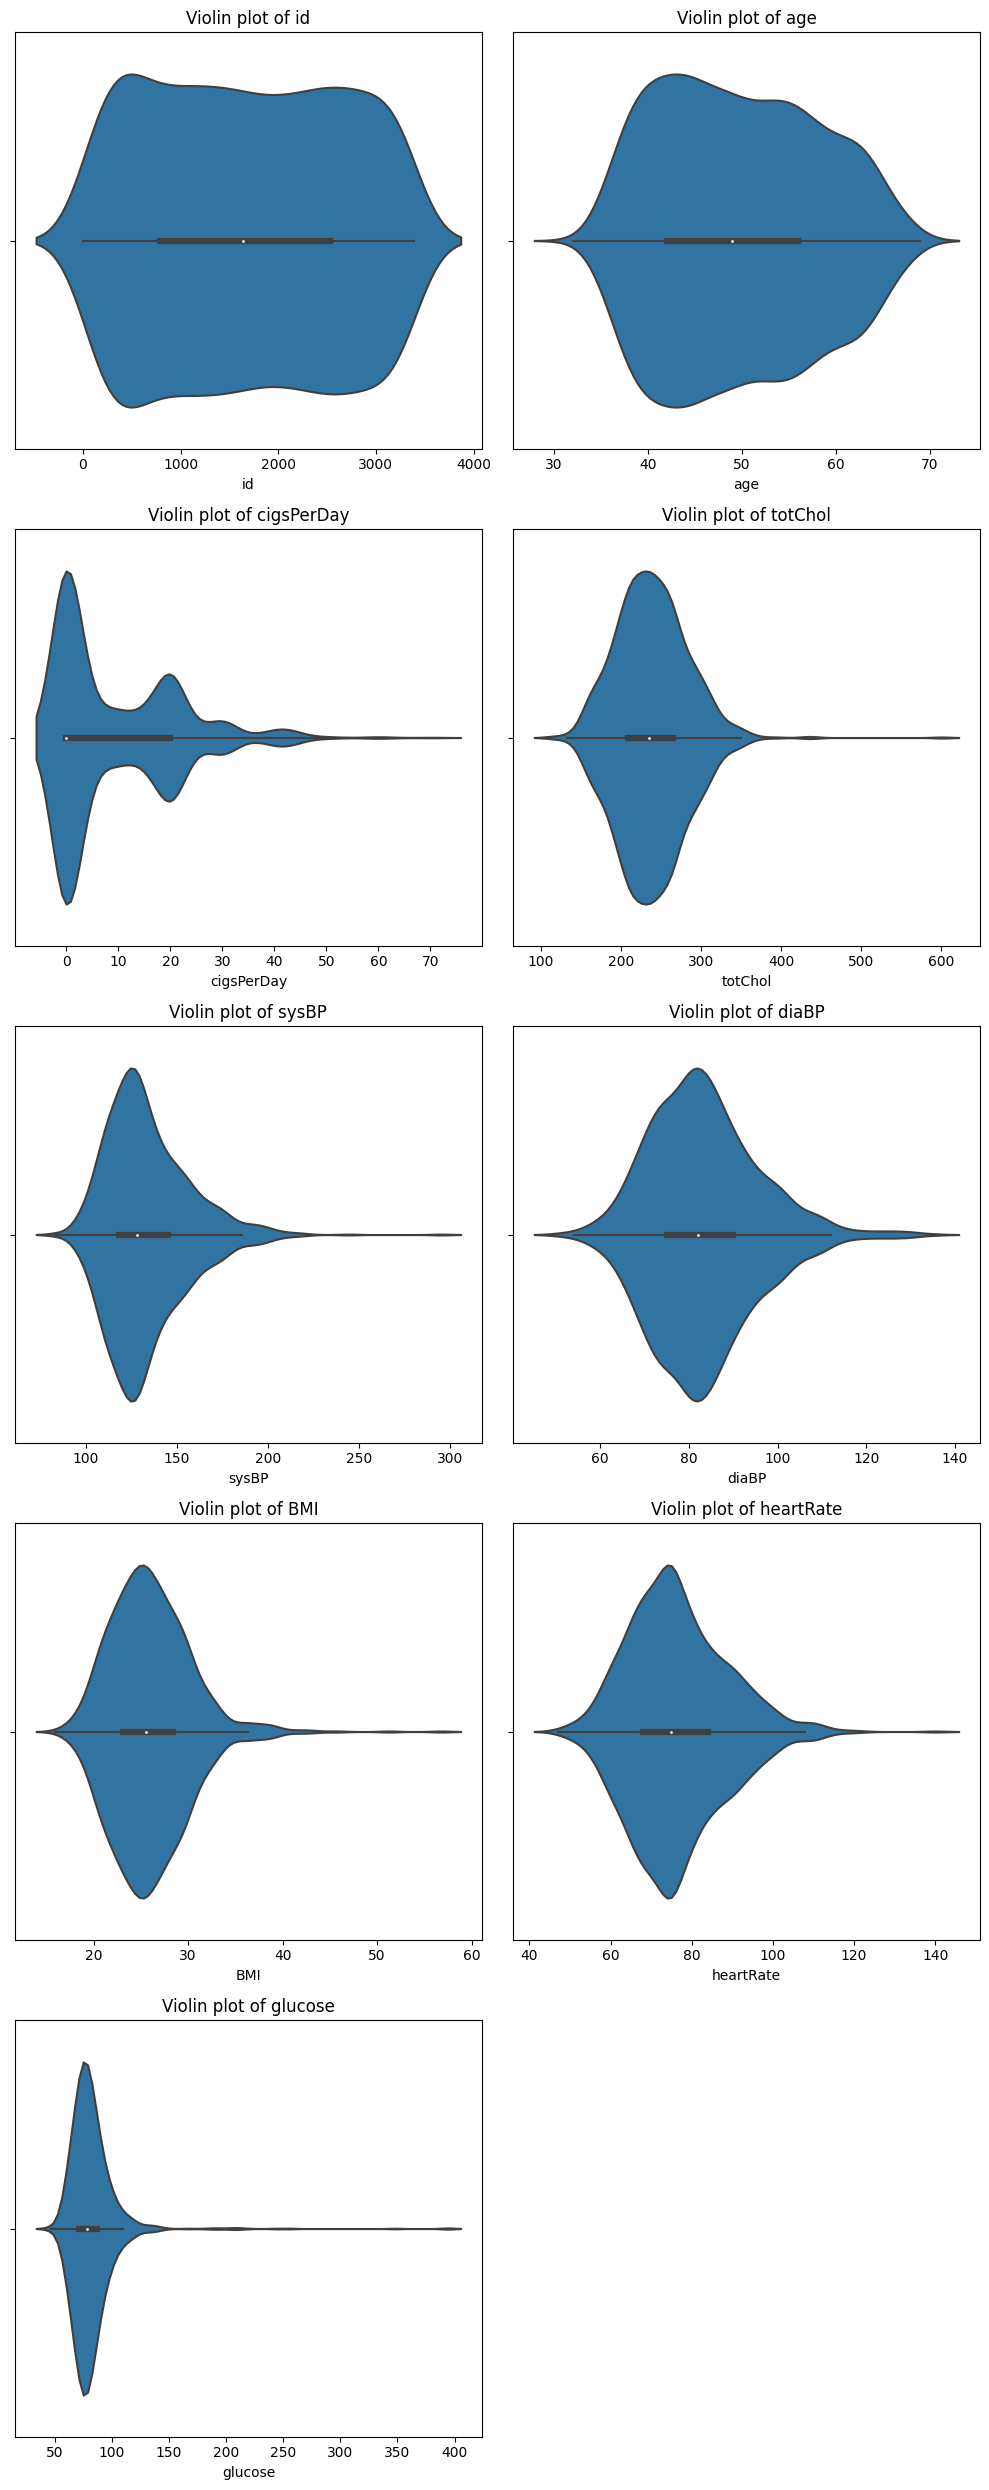

In [12]:

# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = HD.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=HD[column])
    plt.title(f'Violin plot of {column}')



plt.tight_layout()
plt.show()

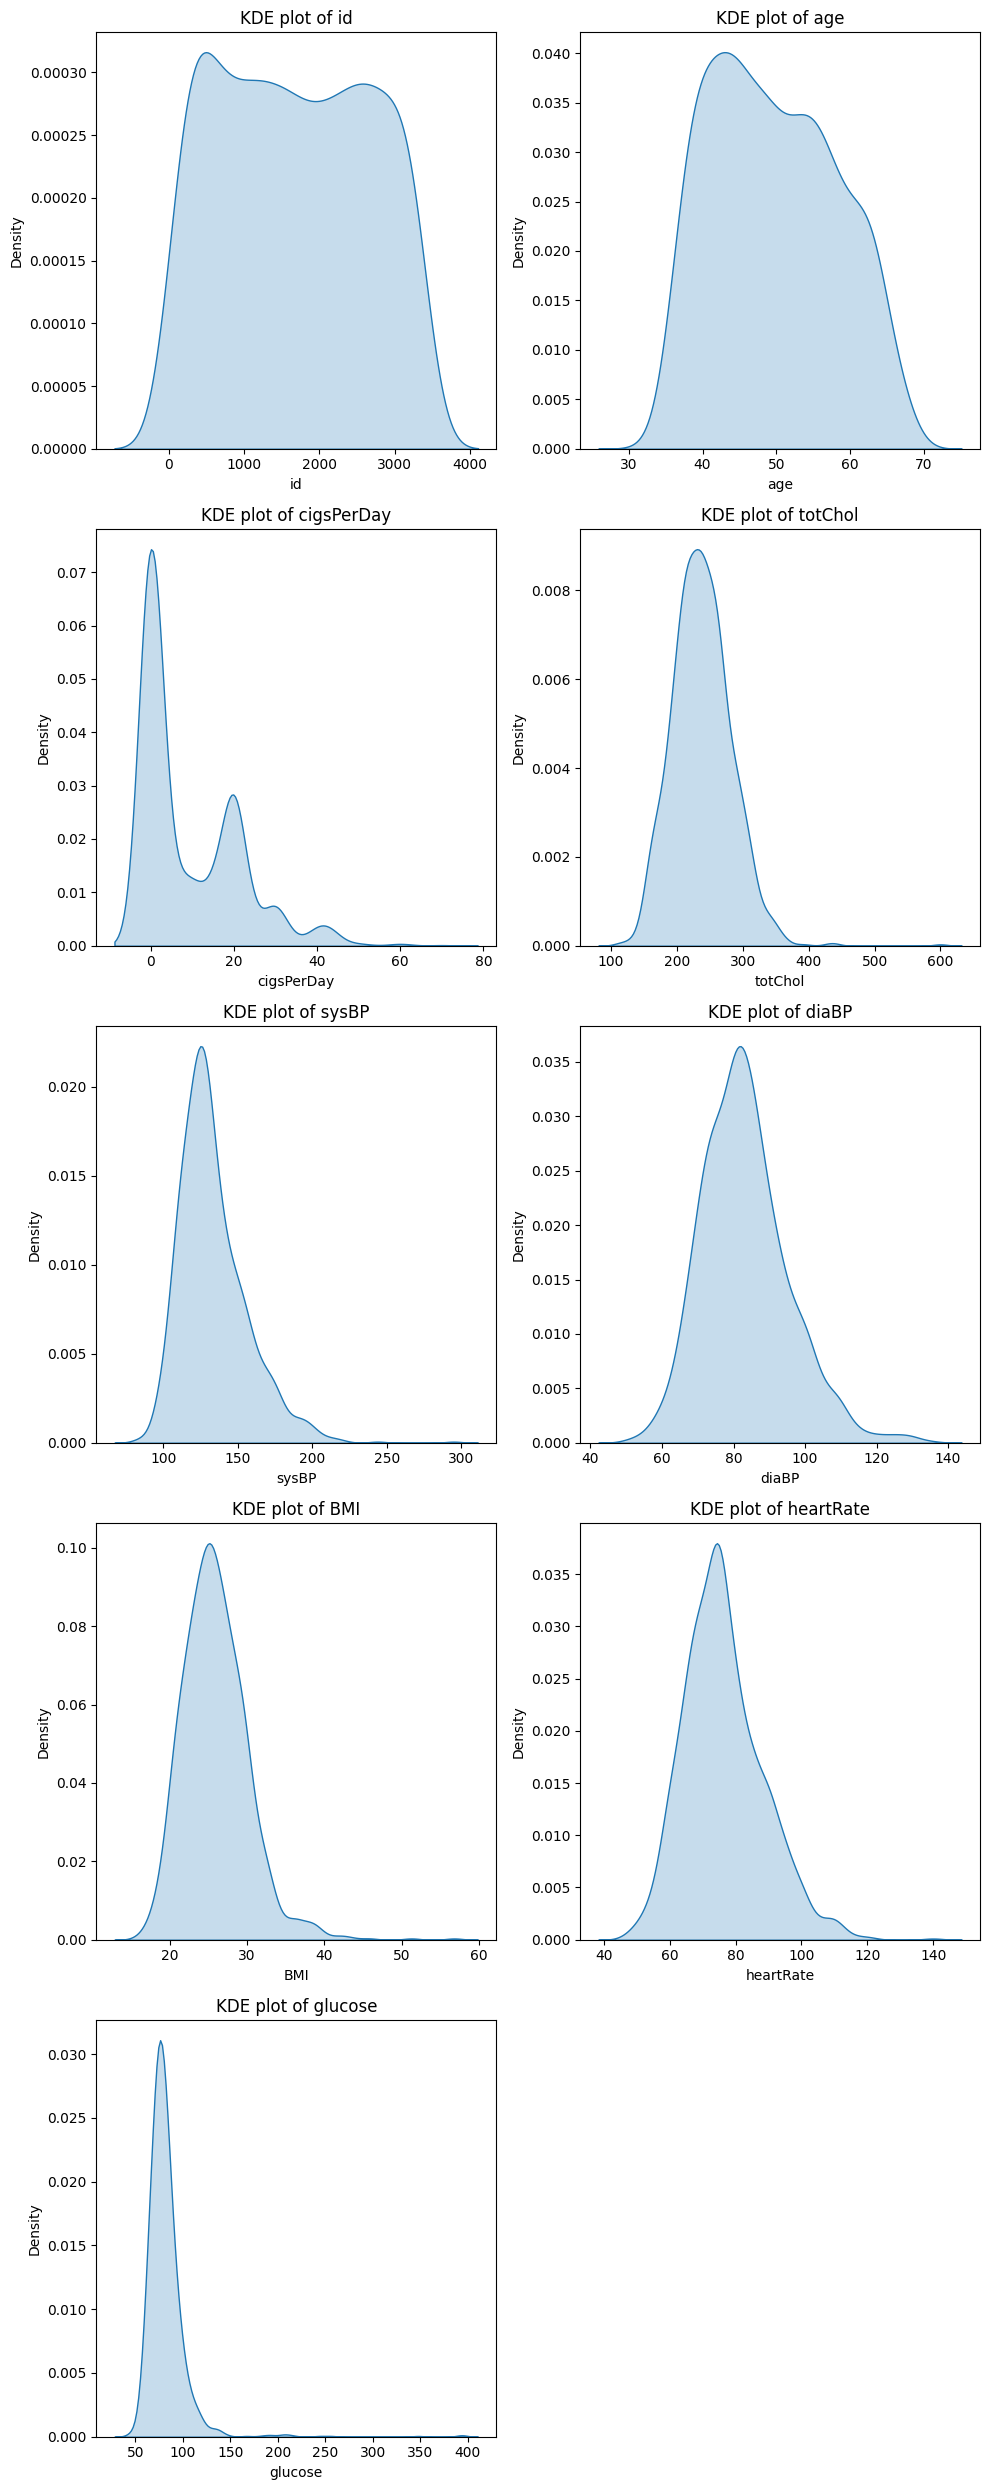

In [13]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = HD.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=HD[column], fill=True)
    plt.title(f'KDE plot of {column}')



plt.tight_layout()
plt.show()

In [14]:
HD['diaBP'].skew()

0.6963505802978013

# Análisis de las distribuciones

#Variable Edad:
La variable "Edad" muestra una distribución con datos bastante centrados. Parece haber dos modas en la distribución, lo que sugiere la posibilidad de que se trate de una distribución bimodal, indicando la presencia de un subgrupo dentro de los datos que puede estar sesgando la distribución hacia un aumento en el eje X. Además, en el gráfico violinplot se pueden observar una cantidad considerable de valores fuera del Rango Intercuartílico (RIQ) en ambas colas de la distribución.

#Variable Total Colesterol:
La variable "Total Colesterol" presenta una distribución con forma parecida a una distribución normal, aunque con un ligero sesgo hacia el lado derecho. En el gráfico violinplot, se puede apreciar una cantidad considerable de valores atípicos en el lado derecho de la distribución. Estos valores atípicos pueden deberse a alguna relación particular con otras variables.

#Variable Presión Arterial Sistólica:
La variable "Presión Arterial Sistólica" muestra una distribución que se asemeja a una distribución normal, con una moda bien definida. Sin embargo, se observa una asimetría considerable en el lado derecho de la distribución, que puede ser atribuida a la gran cantidad de valores fuera del Rango Intercuartílico en la cola derecha. Estos valores atípicos pueden tener alguna relación con la variable objetivo.

#Presión Arterial Diastólica:
La distribución de la variable "Presión Arterial Diastólica" sigue un patrón similar al de la presión arterial sistólica, lo que es probablemente debido a la gran correlación entre estas dos variables. La diferencia notoria es que la distribución de la presión arterial diastólica está más centrada con respecto a la anterior, lo cual puede deberse a una menor cantidad de valores atípicos en la cola derecha de la distribución.

In [15]:
HD.TenYearCHD.value_counts()

0    1002
1     198
Name: TenYearCHD, dtype: int64

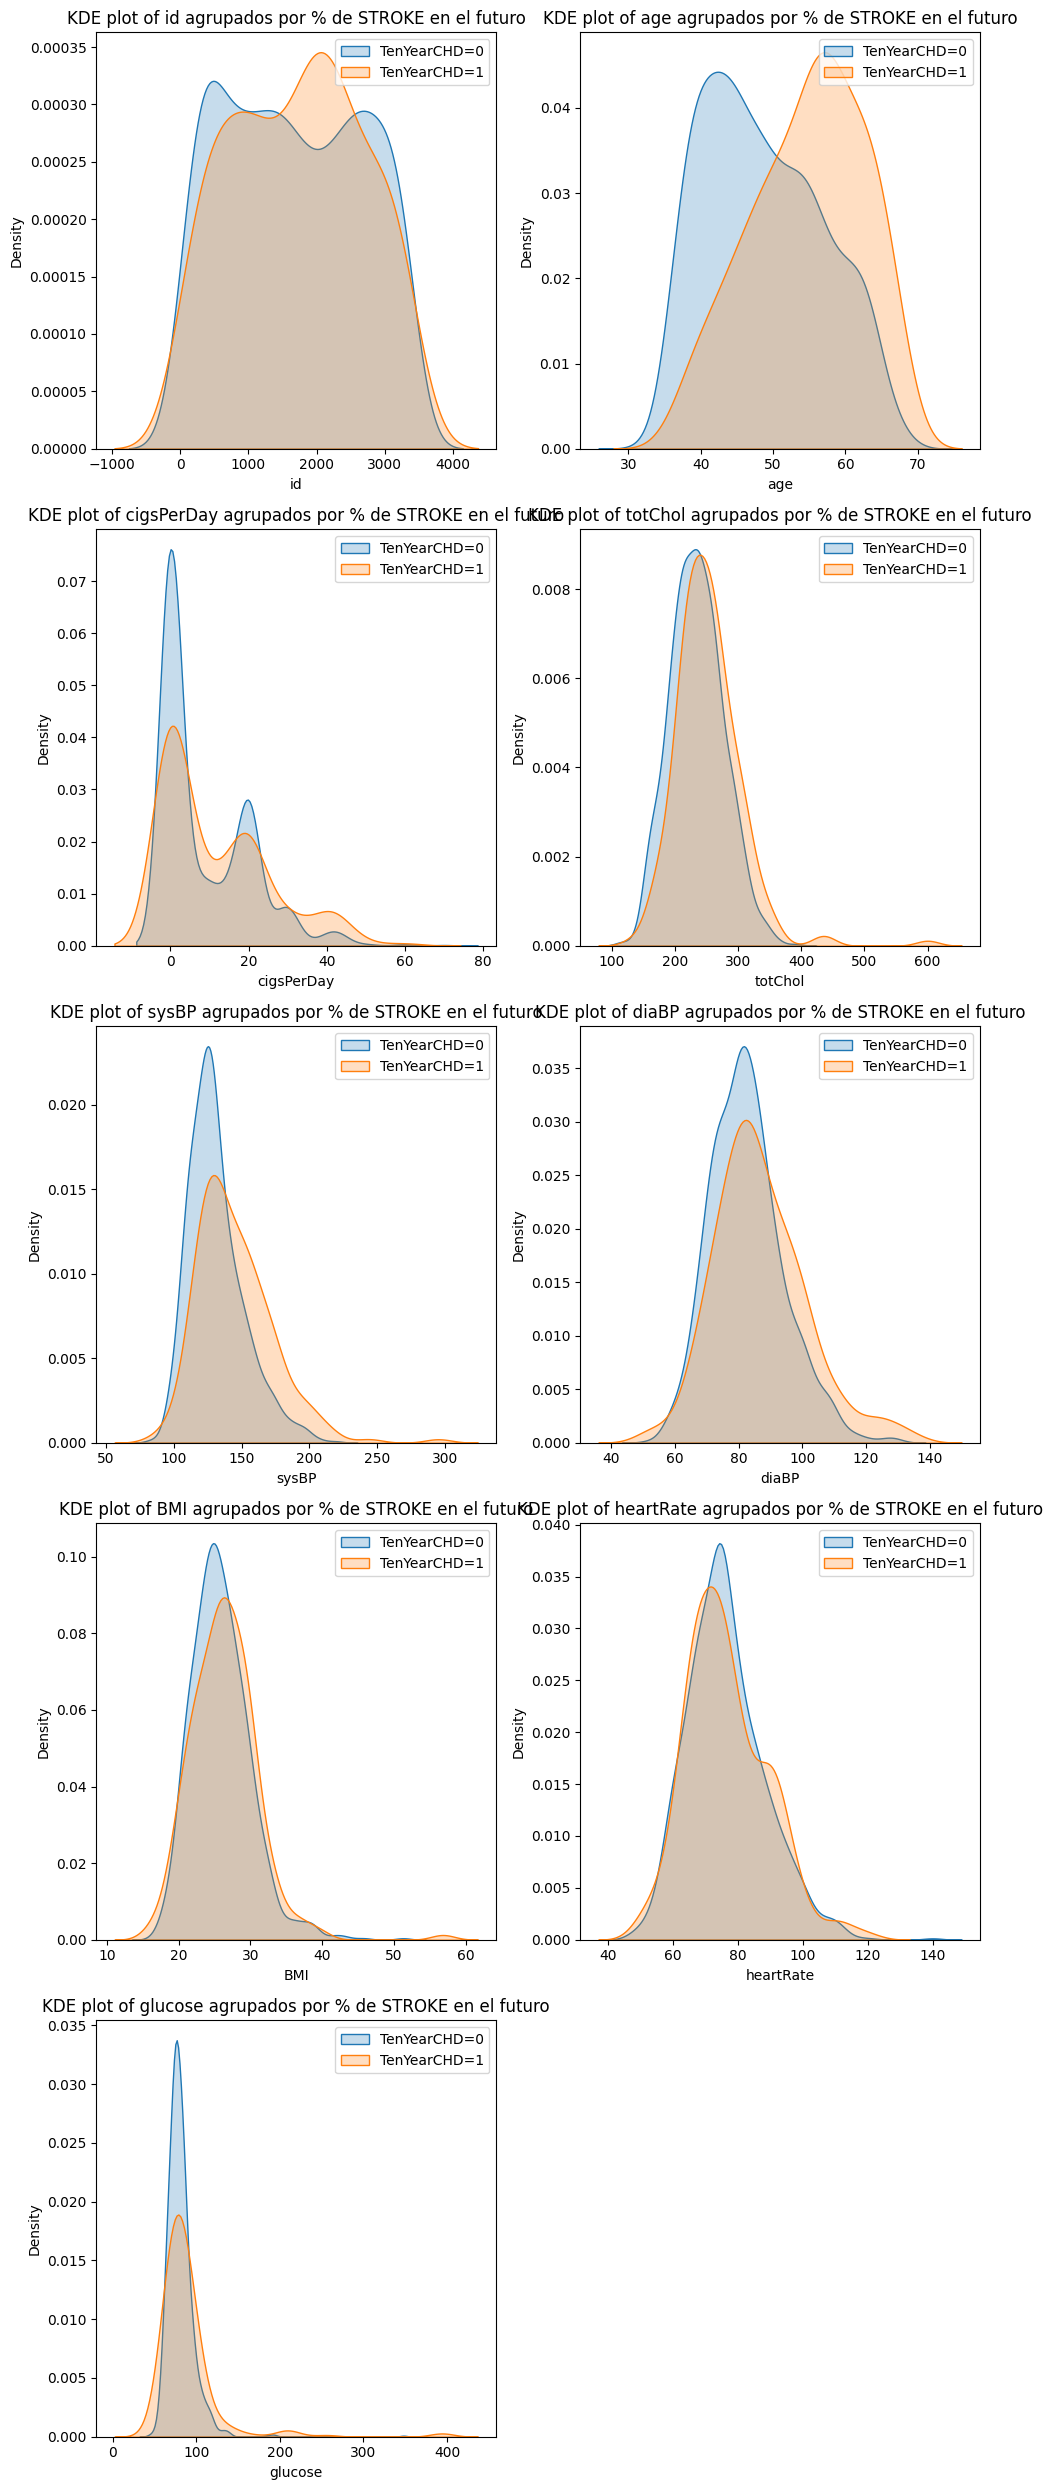

In [16]:
numeric_columns = HD.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=HD[HD['TenYearCHD']==0][column], label='TenYearCHD=0', fill=True)
    sns.kdeplot(data=HD[HD['TenYearCHD']==1][column], label='TenYearCHD=1', fill=True)
    plt.title(f'KDE plot of {column} agrupados por % de STROKE en el futuro')
    plt.legend()



plt.tight_layout()
plt.show()

# Interpretación de los gráficos

# Edad vs Riesgo de Enfermedad Coronaria en 10 años:
En el gráfico de edad vs riesgo de enfermedad coronaria en 10 años, podemos observar que la edad de las personas con probabilidad de tener una enfermedad coronaria está desplazada hacia la derecha. Esto indica que las personas mayores de 51 años tienden a tener una mayor probabilidad de padecer una enfermedad cardíaca en los próximos 10 años. La moda de la distribución para las personas sin riesgo de enfermedad en los próximos 10 años es de 37 años, mientras que para el grupo con riesgo de enfermedad es de 58 años.

# Total Colesterol vs Riesgo de Enfermedad Coronaria en 10 años:
Ambos gráficos siguen una distribución similar, pero en algunas personas del grupo con riesgo de enfermedad en los próximos 10 años, se observan valores extremos. Esto puede deberse a la presencia de un subconjunto de personas con obesidad mórbida que está influyendo en esos valores atípicos.

# Presión Arterial Sistólica vs Riesgo de Enfermedad Coronaria en 10 años:
Las distribuciones en ambos grupos son parecidas, pero el grupo sin riesgo de enfermedad muestra un sesgo hacia la izquierda con una moda bien definida. Por otro lado, el grupo de personas con enfermedad coronaria tiende a concentrarse más hacia la derecha del gráfico, con valores ligeramente más altos. Esto sugiere que las personas con enfermedad coronaria en 10 años tienen más probabilidades de tener una presión arterial sistólica alta en comparación con el otro grupo.

# Presión Arterial Diastólica vs Riesgo de Enfermedad Coronaria en 10 años:
El conjunto de personas con enfermedad coronaria muestra una distribución con forma de campana de Gauss, mientras que el otro grupo tiene una moda bien definida y datos bien centrados. Se repite el mismo patrón que con la presión arterial sistólica, donde las personas que padecerán la enfermedad tienen muchas más probabilidades de tener una presión más alta que las personas que no la padecerán.




# Mapa de calor Basado en la Correlación de las variables

<ipython-input-17-419bb1895e93>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



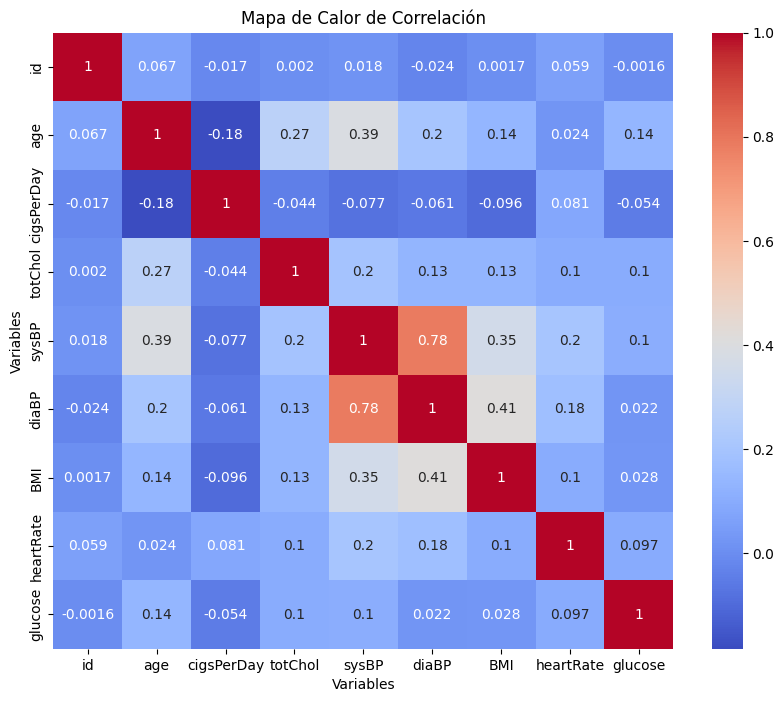

In [17]:
correlation_matrix = HD.corr()  # Calcula la matriz de correlación
plt.figure(figsize=(10, 8))

# Generar el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

# Modelo de Regresión Logística

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Obtener los datos (X e y) para la regresión logística simple
X = HD[['age', 'sysBP','cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]
y = HD['TenYearCHD']

# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística con statsmodels
model2 = sm.Logit(y_train, X_train)
result2 = model2.fit()

# Obtener el resumen del modelo
summary2 = result2.summary()

# Imprimir el resumen
print(summary2)



Optimization terminated successfully.
         Current function value: 0.392288
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                  960
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.1293
Time:                        05:47:18   Log-Likelihood:                -376.60
converged:                       True   LL-Null:                       -432.54
Covariance Type:            nonrobust   LLR p-value:                 3.731e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5005      1.080     -7.870      0.000     -10.618      -6.384
age            0.0696      0.

#Interpretación del modelo de regresión Logística


In [19]:
params = result2.params
# Aplicar exponenciación a los coeficientes para interpretarlos
coeficientes_interpretados = np.exp(params)
print(coeficientes_interpretados)

const         0.000203
age           1.072096
sysBP         1.019078
cigsPerDay    1.037790
totChol       1.006352
BMI           0.969981
heartRate     0.987367
glucose       1.006781
dtype: float64


# Interpretación del modelo de regresión Logística
Los cambios en las variables fueron mínimos, no se encontro una relación importante con respecto a la variable de TenYearCHD.
Se obtuvo un coeficiente de determinaciòn muy bajo por lo que los cambios en Y no son explicables de manera correcta por las variables independientes.  